In [13]:
import pandas as pd
import numpy as np
from  sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt


In [95]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [96]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [97]:
(train_data.corr() > 0.4).sum()

Id                1
MSSubClass        1
LotFrontage       4
LotArea           2
OverallQual      13
OverallCond       1
YearBuilt         8
YearRemodAdd      7
MasVnrArea        3
BsmtFinSF1        4
BsmtFinSF2        1
BsmtUnfSF         2
TotalBsmtSF       9
1stFlrSF         11
2ndFlrSF          6
LowQualFinSF      1
GrLivArea        14
BsmtFullBath      2
BsmtHalfBath      1
FullBath         11
HalfBath          3
BedroomAbvGr      4
KitchenAbvGr      1
TotRmsAbvGrd      8
Fireplaces        4
GarageYrBlt       8
GarageCars       11
GarageArea       10
WoodDeckSF        1
OpenPorchSF       1
EnclosedPorch     1
3SsnPorch         1
ScreenPorch       1
PoolArea          1
MiscVal           1
MoSold            1
YrSold            1
SalePrice        14
dtype: int64

In [101]:
X = train_data[['OverallQual', '1stFlrSF', 'GrLivArea', 'FullBath', 'GarageCars']]
Y = train_data[['SalePrice']]
Xtest = test_data[['OverallQual', '1stFlrSF', 'GrLivArea', 'FullBath', 'GarageCars']]

In [102]:
Xtrain , val_train, Ytrain, val_test = train_test_split(X, Y , test_size = 0.2 , shuffle = True)

In [103]:
Xtrain.isnull().sum()

OverallQual    0
1stFlrSF       0
GrLivArea      0
FullBath       0
GarageCars     0
dtype: int64

In [104]:
Xtest.isnull().sum()

OverallQual    0
1stFlrSF       0
GrLivArea      0
FullBath       0
GarageCars     1
dtype: int64

In [105]:
Xtest = Xtest.fillna(np.mean(Xtest))

In [106]:
Xtest.isnull().sum()

OverallQual    0
1stFlrSF       0
GrLivArea      0
FullBath       0
GarageCars     0
dtype: int64

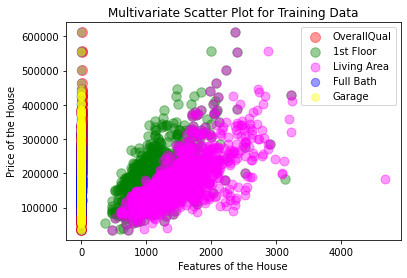

In [107]:
plt.scatter(Xtrain['OverallQual'], Ytrain, color = 'red', alpha = 0.4, s = 100, label = 'OverallQual')
plt.scatter(Xtrain['1stFlrSF'], Ytrain, color = 'green', alpha = 0.4, s = 90, label = '1st Floor')
plt.scatter(Xtrain['GrLivArea'], Ytrain, color = 'magenta', alpha = 0.4, s = 80, label = 'Living Area')
plt.scatter(Xtrain['FullBath'], Ytrain, color = 'blue', alpha = 0.4, s = 70, label = 'Full Bath')
plt.scatter(Xtrain['GarageCars'], Ytrain, color = 'yellow', alpha = 0.4, s = 60, label = 'Garage')

plt.xlabel('Features of the House')
plt.ylabel('Price of the House')
plt.title('Multivariate Scatter Plot for Training Data')
plt.legend()

In [108]:
from sklearn.neighbors import KNeighborsRegressor

In [109]:
knn = KNeighborsRegressor(5)
knn = knn.fit(Xtrain,Ytrain)

In [111]:
Xtest.shape

(1459, 5)

In [112]:
val_test.shape

(292, 1)

In [113]:
knn_pred = knn.score(val_train,val_test)
knn_pred

0.5546827786746275

In [80]:
from sklearn.ensemble import RandomForestRegressor

In [81]:
R = RandomForestRegressor()

In [82]:
R = R.fit(Xtrain , Ytrain)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [83]:
R_pred = R.predict(Xtest)

In [84]:
R_pred.shape

(292,)

In [86]:
R_accuracy = R.score(Xtest,Ytest)
R_accuracy

0.6909363658930137

In [87]:
from sklearn.tree import DecisionTreeRegressor


In [88]:
DT = DecisionTreeRegressor()
DT = DT.fit(Xtrain,Ytrain)

In [89]:
DT_pred = DT.score(Xtest,Ytest)

In [90]:
DT_pred

0.38571997926984103